##### Random Forest Classification

##### Dataset

Download `banknotes.csv`

Location: https://mitu.co.in/dataset

Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

load the dataset

In [19]:
df = pd.read_csv('datasets/banknotes.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [20]:
df.shape

(1372, 5)

Separate the input and output variable

In [29]:
# input data
x = df.drop('Class', axis=1)

# output data
y = df['Class']

##### Cross-Validation

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097,), (275,))

##### Build the model

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rforest = RandomForestClassifier(n_estimators=10, random_state=0)

In [35]:
rforest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [36]:
rforest.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035)]

##### Performance Evaluation

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [38]:
y_pred = rforest.predict(x_test)

In [39]:
confusion_matrix(y_test, y_pred)

array([[155,   2],
       [  1, 117]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [41]:
accuracy_score(y_test, y_pred)

0.9890909090909091

##### Plot the tree

In [42]:
from sklearn.tree import plot_tree

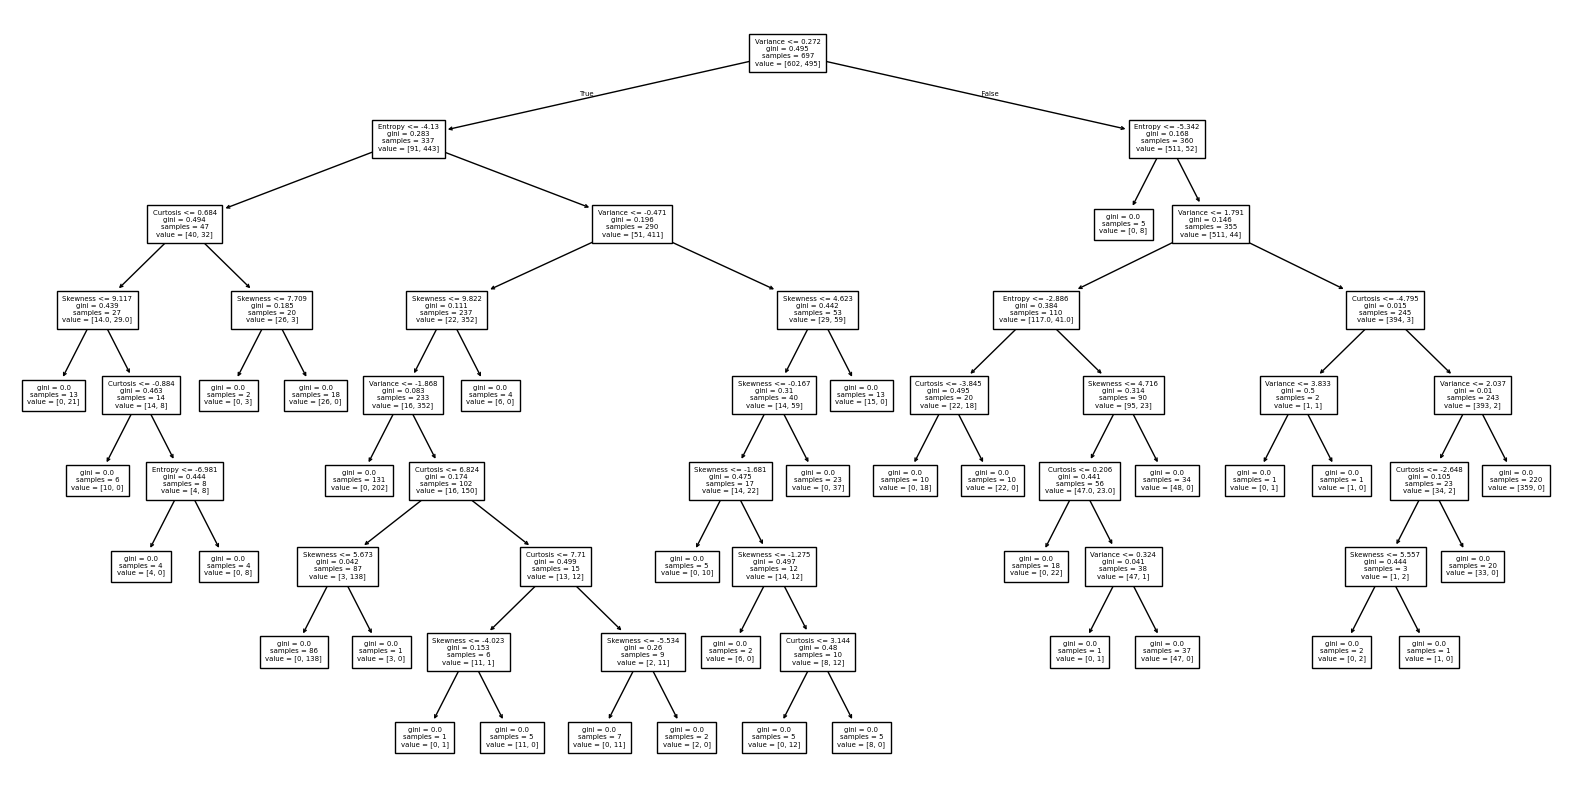

In [49]:
plt.figure(figsize=(20, 10))
plot_tree(rforest.estimators_[2], fontsize=5, feature_names=x.columns); 

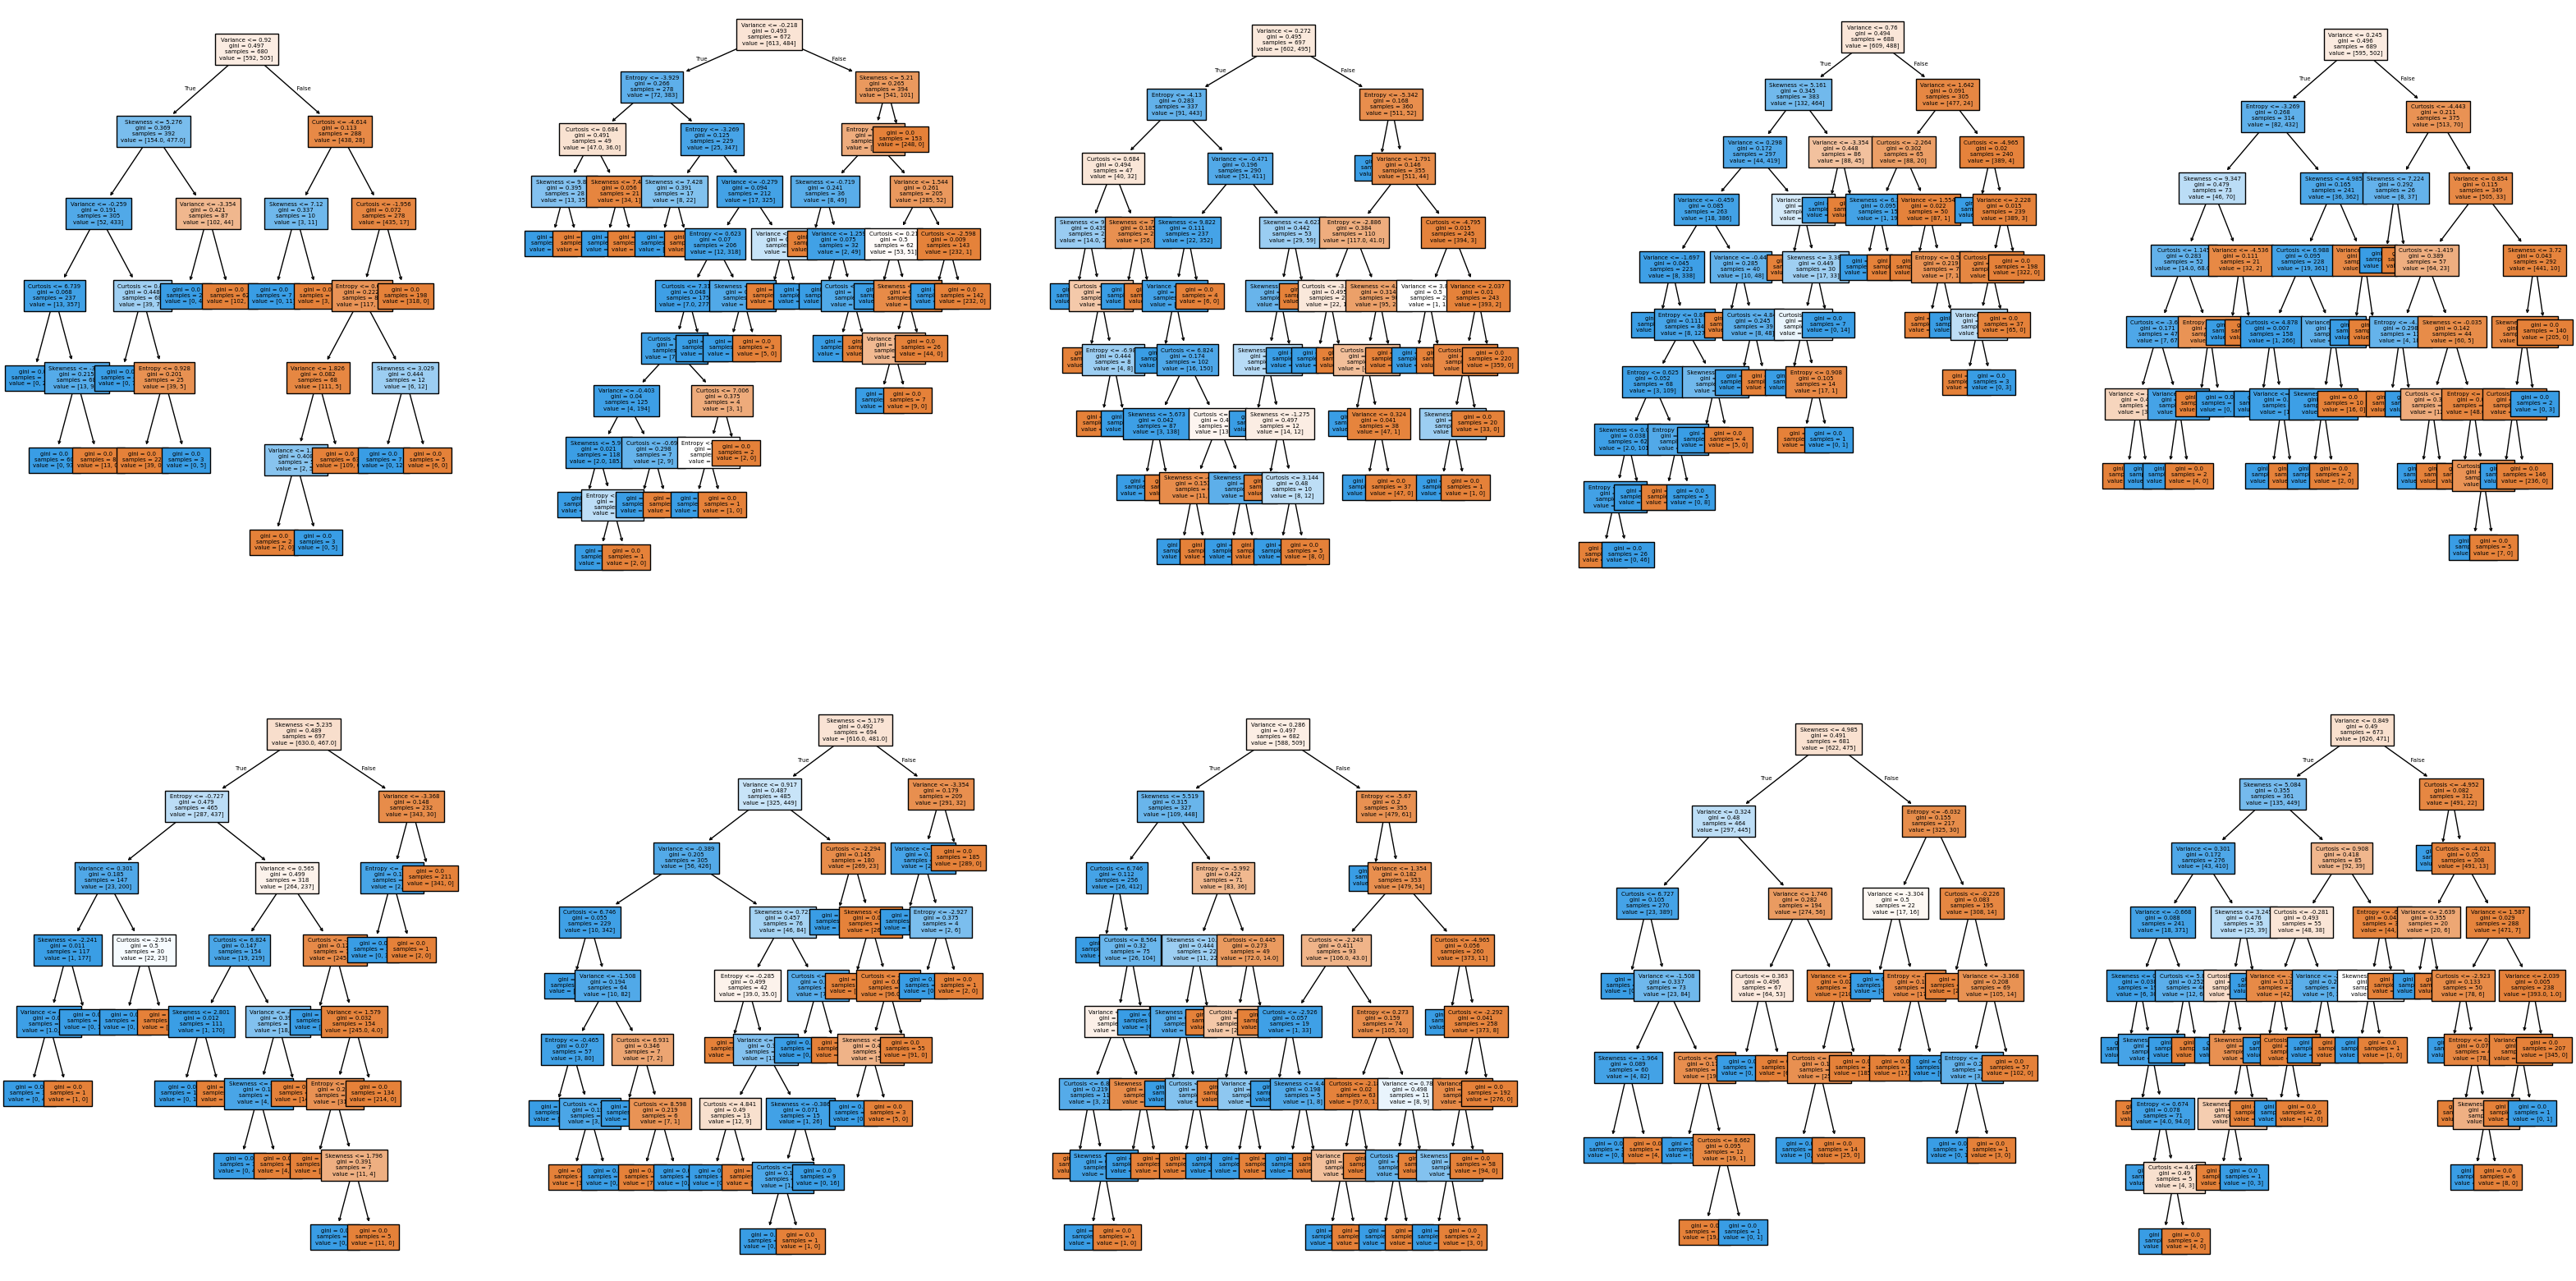

In [54]:
plt.figure(figsize=(40, 20))
for i in range(len(rforest.estimators_)):
    plt.subplot(2, 5, i + 1)
    plt.title(f'Tree: {i + 1}')
    plot_tree(rforest.estimators_[i], fontsize=5, feature_names=x.columns, filled=True)
plt.savefig('images/forest.png')